Importowanie potrzebnych bibliotek i wczytywanie danych

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../input/new-cars-price-2019/New_cars_price.csv', index_col=0)

Pierwsza kolumna zawiera nazwy modeli, usuńmy ją i zamiast niej używajmy indeksów

Przeanalizujmy dostępne kolumny i wybierzmy te które mają jakiekolwiek powiązanie z typem nadwozia, kolumną docelową będzie oczywiście "Body Style"

Pozostawny wyłącznie te, które jakkolwiek odnoszą się do konstrukcji nadwozia i podwozia, są to:

- Drivetrain
- Passenger Capacity
- Passenger Doors
- Base Curb Weight (lbs)
- Passenger Volume (ft³)
- Wheelbase (in)
- Track Width, Front (in)
- Height, Overall (in)
- Turning Diameter - Curb to Curb (ft)
- Front Tire Size

Uprośćmy również ich nazwy i usuńmy wiersze z brakującymi danymi.

In [4]:
df.insert(0, "", range(len(df.index)), True)
df.set_index("", inplace=True)

df = df[["Drivetrain", "Passenger Capacity", "Passenger Doors", "Base Curb Weight (lbs)",
         "Passenger Volume (ft³)", "Wheelbase (in)", "Track Width, Front (in)", "Height, Overall (in)",
          "Turning Diameter - Curb to Curb (ft)", "Front Tire Size", "Body Style"]]
df.columns = ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Weight', 'Passenger Volume',
              'Wheelbase', 'Track Width', 'Height', 'Turning Diameter', 'Front Tire Size', 'Body Style']

df.dropna(inplace=True)

df.head()

,Drivetrain,Passenger Capacity,Passenger Doors,Weight,Passenger Volume,Wheelbase,Track Width,Height,Turning Diameter,Front Tire Size,Body Style
,,,,,,,,,,,
0,Front Wheel Drive,5,4,3790,104.0,108.3,64.2,65.7,39,P235/55HR19,Sport Utility
1,Front Wheel Drive,5,4,3829,104.0,108.3,64.2,65.7,39,P235/55HR19,Sport Utility
2,Front Wheel Drive,5,4,3821,104.0,108.3,64.2,65.7,39,P255/45VR20,Sport Utility
3,Front Wheel Drive,5,4,3783,104.0,108.3,64.2,65.7,39,P235/55HR19,Sport Utility
4,All Wheel Drive,5,4,4026,104.0,108.3,64.2,65.7,39,P235/55HR19,Sport Utility


Kolumna Front Tire Size zawiera dane, które nie są w formacie liczbowym, musimy je przekształcić. Najpierw sprawdźmy, czy wszystkie dane w tej kolumnie są prawidłowe, a następnie podzielmy ją na 3 inne kolumny, opisujące szerokość opony, jej profil, a także wielkość felgi.

Niektóre komórki zawierają dodatkowe oznaczenia, które należy w pierwszej kolejności usunąć.

In [5]:
df.loc[~df["Front Tire Size"].str[0].str.isdigit(), "Front Tire Size"] = df.loc[~df["Front Tire Size"].str[0].str.isdigit(), "Front Tire Size"].str[1:]
df.loc[df["Front Tire Size"].str.len() == 10, "Front Tire Size"] = df.loc[df["Front Tire Size"].str.len() == 10, "Front Tire Size"].str[:6] + df.loc[df["Front Tire Size"].str.len() == 10, "Front Tire Size"].str[7:]
df.drop(df[df["Front Tire Size"].str.len() != 9].index, inplace=True)

tiresWidth = df["Front Tire Size"].str[:3]
tiresProfile = df["Front Tire Size"].str[4:6]
rimSize = df["Front Tire Size"].str[7:9]

df.insert(10, "Tire Width", tiresWidth, True)
df.insert(11, "Tire Profile", tiresProfile, True)
df.insert(12, "Rim Size", rimSize, True)

df.drop("Front Tire Size", axis=1, inplace=True)

df.head()

,Drivetrain,Passenger Capacity,Passenger Doors,Weight,Passenger Volume,Wheelbase,Track Width,Height,Turning Diameter,Tire Width,Tire Profile,Rim Size,Body Style
,,,,,,,,,,,,,
0,Front Wheel Drive,5,4,3790,104.0,108.3,64.2,65.7,39,235,55,19,Sport Utility
1,Front Wheel Drive,5,4,3829,104.0,108.3,64.2,65.7,39,235,55,19,Sport Utility
2,Front Wheel Drive,5,4,3821,104.0,108.3,64.2,65.7,39,255,45,20,Sport Utility
3,Front Wheel Drive,5,4,3783,104.0,108.3,64.2,65.7,39,235,55,19,Sport Utility
4,All Wheel Drive,5,4,4026,104.0,108.3,64.2,65.7,39,235,55,19,Sport Utility


Przeanalizujmy czy wartości pozostałe w kolumnach są na pewno prawidłowe, w tym celu wypiszmy wszytskie wartości unikalne w poszukiwaniu dziwnych, odstających danych.
  
Drivetrain

  - rodzaje napędu zapisane są w różne sposoby
  - '2-Wheel Drive' oraz '2 Wheel Drive' nie wskazują które koła są napędzane, zbyt ogólne dane

In [6]:
print(df["Drivetrain"].unique())

df["Drivetrain"].replace("Front Wheel Drive", "0", inplace=True)
df["Drivetrain"].replace("All Wheel Drive", "3", inplace=True)
df["Drivetrain"].replace("4 Wheel Drive", "2", inplace=True)
df["Drivetrain"].replace("Rear Wheel Drive", "1", inplace=True)
df["Drivetrain"].replace("All-Wheel Drive", "3", inplace=True)
df["Drivetrain"].replace("Front-Wheel Drive", "0", inplace=True)
df["Drivetrain"].replace("All wheel drive", "3", inplace=True)
df["Drivetrain"].replace("All-wheel drive", "3", inplace=True)
df["Drivetrain"].replace("AWD", "3", inplace=True)
df["Drivetrain"].replace("4-Wheel Drive", "2", inplace=True)
df["Drivetrain"].replace("Rear wheel drive", "1", inplace=True)
df["Drivetrain"].replace("Front wheel drive", "0", inplace=True)
df["Drivetrain"].replace("Four Wheel Drive", "2", inplace=True)
df["Drivetrain"].replace("Front-wheel drive", "0", inplace=True)
df["Drivetrain"].replace("Four wheel drive", "2", inplace=True)
#df["Drivetrain"].replace("2-Wheel Drive", "0", inplace=True)
#df["Drivetrain"].replace("2 Wheel Drive", "0", inplace=True)
df["Drivetrain"].replace("Four-Wheel Drive", "2", inplace=True)
df["Drivetrain"].replace("Rear-Wheel Drive", "1", inplace=True)

df.drop(df[df["Drivetrain"] == "2-Wheel Drive"].index, inplace=True)
df.drop(df[df["Drivetrain"] == "2 Wheel Drive"].index, inplace=True)

df['Drivetrain'] = pd.to_numeric(df['Drivetrain'])

print(df["Drivetrain"].unique())

['Front Wheel Drive' 'All Wheel Drive' '4 Wheel Drive' 'Rear Wheel Drive'
 'All-Wheel Drive' 'Front-Wheel Drive' 'All wheel drive' 'All-wheel drive'
 'AWD' '4-Wheel Drive' 'Rear wheel drive' 'Front wheel drive'
 'Four Wheel Drive' 'Front-wheel drive' 'Four wheel drive' '2-Wheel Drive'
 '2 Wheel Drive' 'Four-Wheel Drive' 'Rear-Wheel Drive']
[0 3 2 1]


Passenger Capacity
- samochody mogące pomieścić tylko 1 pasażera

In [7]:
print(df["Passenger Capacity"].unique())

print(len(df.loc[df["Passenger Capacity"] == 1]))

#jest tylko 1 taki rekord

df.drop(df[df["Passenger Capacity"] == 1].index, inplace=True)

print(df["Passenger Capacity"].unique())

[5 7 6 2 4 8 1]
1
[5 7 6 2 4 8]


Passenger Doors
- dane wyglądają prawidłowo

In [8]:
print(df["Passenger Doors"].unique())

[4 2 3]


Weight
- zły format danych

In [9]:
print(df["Weight"].unique())

df.drop(df[~df["Weight"].str.isnumeric()].index, inplace=True)

df['Weight'] = pd.to_numeric(df['Weight'])

print(df["Weight"].unique())

['3790' '3829' '3821' ... '4394' '4753' '4791']
[3790 3829 3821 ... 4394 4753 4791]


Height
- zły format danych wysokości

In [10]:
print(df["Height"].unique())

df['Height'] = pd.to_numeric(df['Height'])

print(df["Height"].unique())

['65.7' '65.0' '66.1' '65.2' '65.1' '67.4' '67.6' '68.2' '65.9' '68.7'
 '71.3' '57.0' '55.6' '47.8' '46.1' '57.7' '56.5' '57.1' '56.1' '57.8'
 '57.800' '58.2' '57.4' '57.5' '57.2' '58.4' '55.900' '55.9' '55.4'
 '55.400' '56.2' '54.8' '55.7' '54.9' '55.8' '68.4' '56.200' '56.7' '56.8'
 '54.4' '54.0' '54.400' '54.000' '53.8' '56.000' '56.0' '65.3' '53.2'
 '53.1' '53.5' '53.0' '57.9' '57.3' '53' '55.3' '55.1' '54.7' '55.2'
 '55.0' '58.6' '54.500' '54.900' '54.100' '54.5' '54.1' '54' '55.5' '56.3'
 '53.9' '53.7' '54.6' '53.4' '52.6' '52.8' '50.9' '50.7' '69.900' '69.9'
 '69.5' '67.5' '67.2' '67.8' '66.0' '65.4' '50.8' '57.637' '61.4' '58.3'
 '58.7' '58.0' '56.6' '62.9' '63.5' '63.8' '49.9' '51.3' '51.1' '50.1'
 '66.3' '66.5' '58.5' '58.1' '60.6' '53.700' '53.900' '54.2' '60.1'
 '65.25' '65.26' '65.20' '70.3' '72.5' '72.2' '57.50' '59.2' '66.8'
 '64.06' '74.3' '75.0' '55.90' '59.4' '59.10' '59.45' '57.20' '56.00'
 '58.00' '59.1' '57.30' '54.80' '55.30' '56.4' '54.50' '55.70' '48.7'
 '48.8' 

Turning Diameter
- promienie zawracania zawierające jednostki, zły format danych

In [11]:
print(df["Turning Diameter"].unique())

df.drop(df[~df["Turning Diameter"].str.replace('.','',1).str.isnumeric()].index, inplace=True)

df['Turning Diameter'] = pd.to_numeric(df['Turning Diameter'])

print(df["Turning Diameter"].unique())

['39' '38.9' '39.0' '39.2' '37.4' '38.7' '38.4' '37.6' '38.0' '38' '37.2'
 '37.8' '39.5' '38.8' '36.8' '36.1' '36.100' '39.7' '38.1' '40.5' '35.5'
 '39.000' '38.3' '34.8' '37.7' '37.400' '36.4' '39.4' '37.700' '35.100'
 '35.1' '35.11' '36' '35.96' '36.0' '34.2' '34.7' '41.7' '41.0' '40.4'
 '37' '37.1' '37.3' '37.0' '38.700' '34.4' '35.8' '35.4' '34.1' '32.8'
 '42.000' '42.0' '40.2' '40.1' '39.206' '40.0' '40.7' '37.5' '40' '32.2'
 '34.3' '32.0' '42' '42.7' '41.3' '39.8' '41' '38.400' '36.7' '38.05'
 '35.99' '36.38' '36.40' '31.15' '35.40' '36.6' '35.0' '35.9' '57.1'
 '56.2' '40.3' '37.9' '37.90' '38.38' '42.3' '40.8' '40.64' '40.09'
 '40.65' '36.00' '41.8' '36.3' '35.7' '33.8' '32.5' '38.00' '40.00' '39.6'
 '43.6' '34.5' '34.50' '36.10' '38.5' '38.900' '37.500' '39.9' '39.1'
 '39.100' '30.6' '32.3' '31.3' '36.9' '31.4' '31.5' '35.6' '38.6' '42.6'
 '34.9' '34.700' '34.120' '34.780' '33.9' '33.2' '17.25' '17.3' '34.6'
 '33.5' '34.100' '33.1' '15.9' '31.8' '36.5' '41.2' '34.0' '35.3' '35.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Tire Width
- szerokości opon z dodatkowymi oznaczeniami, zły format danych

In [12]:
print(df["Tire Width"].unique())

df.drop(df[~df["Tire Width"].str.replace('.','',1).str.isnumeric()].index, inplace=True)

df['Tire Width'] = pd.to_numeric(df['Tire Width'])

print(df["Tire Width"].unique())

['235' '255' '245' '265' '225' '215' '205' '195' '275' '285' '185' '305'
 '175' '165' '155' '295' 'T25' 'T24']
[235 255 245 265 225 215 205 195 275 285 185 305 175 165 155 295]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Tire Profile
- profile opon z dodatkowym oznaczeniem, zły format danych

In [13]:
print(df["Tire Profile"].unique())

df.drop(df[~df["Tire Profile"].str.replace('.','',1).str.isnumeric()].index, inplace=True)

df['Tire Profile'] = pd.to_numeric(df['Tire Profile'])

print(df["Tire Profile"].unique())

['55' '45' '60' '50' '65' '40' '35' '70' '30' '75' '80']
[55 45 60 50 65 40 35 70 30 75 80]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Rim Size
  - zły format danych

In [14]:
print(df["Rim Size"].unique())

df.drop(df[~df["Rim Size"].str.replace('.','',1).str.isnumeric()].index, inplace=True)

df['Rim Size'] = pd.to_numeric(df['Rim Size'])

print(df["Rim Size"].unique())

['19' '20' '18' '17' '16' '15' '21' '22' '14' '13']
[19 20 18 17 16 15 21 22 14 13]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Body Style
- typy nadwozia niewskazujące na jego kształt

In [15]:
print(df["Body Style"].unique())

df.drop(df[df["Body Style"] == "4dr Car"].index, inplace=True)
df.drop(df[df["Body Style"] == "2dr Car"].index, inplace=True)
df.drop(df[df["Body Style"] == "3dr Car"].index, inplace=True)

print(df["Body Style"].unique())

['Sport Utility' '4dr Car' '2dr Car' 'Convertible' 'Station Wagon'
 'Mini-van, Passenger' 'Crew Cab Pickup - Short Bed' '3dr Car' 'Hatchback'
 'Full-size Passenger Van']
['Sport Utility' 'Convertible' 'Station Wagon' 'Mini-van, Passenger'
 'Crew Cab Pickup - Short Bed' 'Hatchback' 'Full-size Passenger Van']


Następnie zmniejszmy ilość danych, tak aby obliczenia trwały sensowną ilość czasu

In [16]:
print(df['Body Style'].value_counts())

df = df.drop(df[df['Body Style'] == 'Sport Utility'].sample(frac=.9).index)
df = df.drop(df[df['Body Style'] == 'Station Wagon'].sample(frac=.5).index)
df = df.drop(df[df['Body Style'] == 'Convertible'].sample(frac=.4).index)

print(df['Body Style'].value_counts())

Station Wagon                  446
Sport Utility                  419
Convertible                    411
Mini-van, Passenger            401
Crew Cab Pickup - Short Bed     37
Hatchback                       12
Full-size Passenger Van          8
Name: Body Style, dtype: int64


Zamieńmy nasze typy nadwozia na liczby

In [17]:
map = {
    "Convertible": "0",
    "Station Wagon": "1",        
    "Sport Utility": "2",          
    "Mini-van, Passenger": "3",        
    "Crew Cab Pickup - Short Bed": "4", 
    "Hatchback": "5",                   
    "Full-size Passenger Van": "6"    
}

for bodyType in map:
  df["Body Style"].replace(bodyType, map[bodyType], inplace=True)

df['Body Style'] = pd.to_numeric(df['Body Style'])

df.head()

,Drivetrain,Passenger Capacity,Passenger Doors,Weight,Passenger Volume,Wheelbase,Track Width,Height,Turning Diameter,Tire Width,Tire Profile,Rim Size,Body Style
,,,,,,,,,,,,,
1,0,5,4,3829,104.0,108.3,64.2,65.7,39.0,235,55,19,2
3,0,5,4,3783,104.0,108.3,64.2,65.7,39.0,235,55,19,2
5,3,5,4,4068,104.0,108.3,64.2,65.7,39.0,235,55,19,2
18,0,5,4,3774,103.5,105.7,63.1,65.0,38.9,235,60,18,2
24,3,5,4,3931,103.5,105.7,63.1,65.0,38.9,235,60,18,2


Rozprawmy się ze złym zbalansowaniem zestawu i podzielmy dataFrame na data i target

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = df.iloc[: , :12]
y = df["Body Style"]

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

2    446
0    446
1    446
3    446
4    446
5    446
6    446
Name: Body Style, dtype: int64


Definicja heatmapy z zajęć, pomagająca dobierać odpowiednie parametry i obrazować co się dzieje z klasyfikatorem

In [19]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

Przejdźmy do modelowania

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

models = []

In [21]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

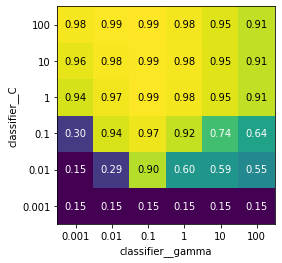

In [22]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', probability=True))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_1.fit(X_train, y_train)

results = pd.DataFrame(grid_1.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

models.append(('SVM rbf', grid_1.best_estimator_))

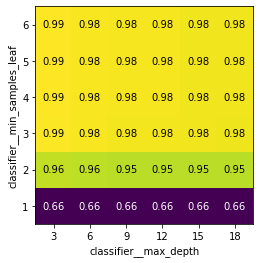

In [23]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier(max_depth=4, random_state=0))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [3, 6, 9, 12, 15, 18],
            'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)

results = pd.DataFrame(grid_2.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
heatmap(scores, xlabel='classifier__max_depth', xticklabels=param_grid['classifier__max_depth'], ylabel='classifier__min_samples_leaf', yticklabels=param_grid['classifier__min_samples_leaf'], cmap="viridis")
plt.show()

models.append(('Decision tree', grid_2.best_estimator_))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWa

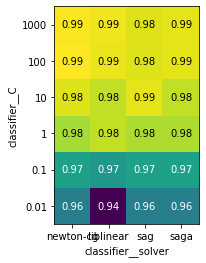

In [24]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)

results = pd.DataFrame(grid_3.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 4, 2)
scores = scores[:,:,0]
heatmap(scores, xlabel='classifier__solver', xticklabels=param_grid['classifier__solver'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

models.append(('Logistic regression', grid_3.best_estimator_))

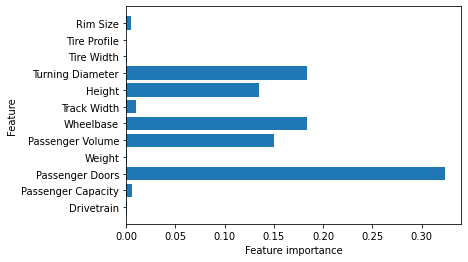

In [25]:
objects = list(df.columns)
objects.pop()
y_pos = np.arange(len(objects))
performance = grid_2.best_estimator_.steps[1][1].feature_importances_

plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.show()

Przejdźmy teraz do nauczenia sieci neuronowej


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import History

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

categorical_y_train = np_utils.to_categorical(y_train)
categorical_y_test = np_utils.to_categorical(y_test)

history = History()
model = Sequential()
model.add(Dense(7, activation="softmax", input_dim=12))
model.add(Dense(7, activation="softmax"))
model.add(Dense(7, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 91        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


2022-06-16 03:03:22.605075: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(scaled_X_train, categorical_y_train, validation_data=(scaled_X_test, categorical_y_test), batch_size=1, epochs=50)
models.append(('Neural network', model))

2022-06-16 03:03:22.807887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
2091/2091 [==============================] - 6s 2ms/step - loss: 1.7618 - accuracy: 0.3372 - val_loss: 1.4725 - val_accuracy: 0.5558
Epoch 2/50
2091/2091 [==============================] - 5s 2ms/step - loss: 1.2473 - accuracy: 0.5791 - val_loss: 1.0655 - val_accuracy: 0.5664
Epoch 3/50
2091/2091 [==============================] - 4s 2ms/step - loss: 0.9195 - accuracy: 0.6050 - val_loss: 0.8293 - val_accuracy: 0.5984
Epoch 4/50
2091/2091 [==============================] - 4s 2ms/step - loss: 0.7543 - accuracy: 0.6231 - val_loss: 0.7366 - val_accuracy: 0.6178
Epoch 5/50
2091/2091 [==============================] - 6s 3ms/step - loss: 0.6866 - accuracy: 0.6547 - val_loss: 0.6924 - val_accuracy: 0.6198
Epoch 6/50
2091/2091 [==============================] - 5s 2ms/step - loss: 0.6498 - accuracy: 0.6691 - val_loss: 0.6705 - val_accuracy: 0.6479
Epoch 7/50
2091/2091 [==============================] - 5s 2ms/step - loss: 0.6253 - accuracy: 0.6963 - val_loss: 0.6456 - val_accuracy:

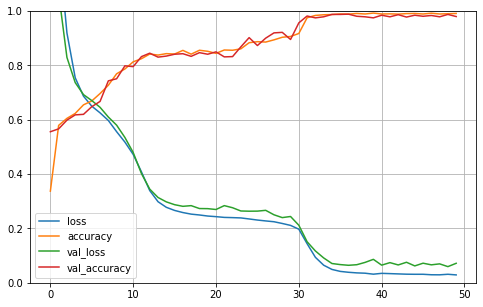

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Podsumowanie, porównanie metryk wszytskich klasyfkatorów

In [29]:
from sklearn import metrics

classifier = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

def vote(arr):
  ret = []
  for x in arr:
    ret.append(singleVote(x))
  return ret

def singleVote(vec):
  max = vec[0]
  index = 0
  for i in range(1, 7):
    if vec[i] > max:
      max = vec[i]
      index = i
  return index

for name, model in models:
    if name == 'Neural network':
      classifier.append(name)
      accuracy_score.append(np.around(metrics.accuracy_score(y_test, vote(model.predict(scaled_X_test))), 2))
      precision_score.append(np.around(metrics.precision_score(y_test, vote(model.predict(scaled_X_test)), average=None), 2))
      recall_score.append(np.around(metrics.recall_score(y_test, vote(model.predict(scaled_X_test)), average=None), 2))
      f1_score.append(np.around(metrics.f1_score(y_test, vote(model.predict(scaled_X_test)), average=None), 2))
    else:
      classifier.append(name)
      accuracy_score.append(np.around(metrics.accuracy_score(y_test, model.predict(X_test)), 2))
      precision_score.append(np.around(metrics.precision_score(y_test, model.predict(X_test), average=None), 2))
      recall_score.append(np.around(metrics.recall_score(y_test, model.predict(X_test), average=None), 2))
      f1_score.append(np.around(metrics.f1_score(y_test, model.predict(X_test), average=None), 2))

d = {'classifier': classifier,
     'accuracy_score' : accuracy_score,
     'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score
    }
scores = pd.DataFrame(data=d)
scores

,classifier,accuracy_score,precision_score,recall_score,f1_score
0,SVM rbf,0.99,"[1.0, 0.97, 0.99, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.99, 0.97, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.98, 1.0, 1.0, 1.0, 1.0]"
1,Decision tree,0.99,"[1.0, 0.97, 0.99, 0.99, 1.0, 1.0, 0.99]","[1.0, 0.99, 0.95, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.97, 1.0, 1.0, 1.0, 1.0]"
2,Logistic regression,0.99,"[1.0, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.95, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.97, 0.97, 1.0, 1.0, 1.0, 1.0]"
3,Neural network,0.98,"[1.0, 0.99, 0.92, 0.98, 1.0, 1.0, 0.98]","[0.99, 0.91, 0.98, 0.98, 1.0, 1.0, 1.0]","[1.0, 0.95, 0.95, 0.98, 1.0, 1.0, 0.99]"
